# TP 1 - Análisis de datos comerciales para entender su Composición

`Dataset: Datos.csv`

*La introducción y análsis estan en el Readme*

## Diccionario


* Origin:  indica si el origen del pedido es marketplace o fulfillment.
* Sequence:  es la secuencia numérica de la transacción del pedido.
* Creation Date:  es la fecha y hora en que el cliente realizó el pedido.
* Client Document:  es el número de identificación fiscal del cliente que realizó el pedido.
* UF:  es el estado, provincia, región o departamento desde el que el cliente realizó el pedido.
* City:  es la ciudad desde la que el cliente realizó el pedido.
* Address Type:  es el tipo de dirección de entrega (domicilio o recogida).
* Postal Code:  es el código postal de la dirección de entrega.
* Courier:  es la transportadora responsable de la entrega.
* Status:  es el status del pedido en el momento de exportación la plantilla.
* Coupon:  es el ID del cupón del pedido, si lo hay.
* Quantity_SKU:  es la cantidad de ítems del mismo SKU.
* Category Ids Sku:  son los ID de las categorías en los que se encuentra el SKU. Esta información se presenta siguiendo el árbol de departamento/categoría/subcategoría. Por ejemplo, si el valor es /1000003/1000016/, eso significa que el SKU está en la categoría 1000016, que a su vez forma parte del departamento 1000003.
* Reference Code:  es el código de referencia del SKU.
* SKU Selling Price:  es el precio al que se vendió el SKU realmente, ya con los descuentos o promociones aplicados.
* SKU Total Price:  es el valor total del SKU en el pedido, considerando todos os ítems del SKU.
* Total Value:  es el valor total del pedido. Atención
* Discounts Names:  son las promociones aplicadas al pedido.
* Canceled By:  es el email del usuario que realizó la cancelación del pedido.
* Corporate Document:  es el número de registro de persona jurídica, cuando el pedido es realizado por una empresa.
* SalesChannel:  es el ID de la política comercial del pedido.

## Código

### <h3 style="color:#900000; font-weight:bold;">Inicializando Datos</h3>

In [1]:
# Importación de librerias
import pandas as pd
import numpy as np
import locale
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de area local
locale.setlocale(locale.LC_TIME, 'Spanish_Argentina.1252')

# selección de paleta de color
sns.set_theme(style="whitegrid", palette="bright")

In [2]:
# Asignacion del dataset a la variable "dataset"
dataset = pd.read_csv('./Datos/Datos.csv',sep=';')

In [3]:
# Lectura básica de la cabecera
dataset.head()

,Origin,Sequence,Creation Date,Client Document,UF,City,Address Type,Postal Code,Courrier,Status,...,Quantity_SKU,Category Ids Sku,Reference Code,SKU Selling Price,SKU Total Price,Total Value,Discounts Names,Cancelled By,Corporate Document,SalesChannel
0,Marketplace,16499,2020-06-12 15:48:08Z,1,Buenos Aires,Olavarria,pickup,7400,Correo Sucursal,Faturado,...,1,/1/50/59/,1 - 1213,16999.0,16999.0,118098.00,x,NaN,NaN,1
1,Marketplace,5303,2020-06-06 21:04:26Z,2,Córdoba,Córdoba,residential,5014,Correo,Faturado,...,1,/1/34/78/,2 - 0,8999.0,8999.0,63897.99,x,NaN,NaN,1
2,Marketplace,725,2020-06-01 22:38:00Z,3,Córdoba,Córdoba,residential,5000,Correo,Faturado,...,1,/1/34/78/,3 - 0,9629.1,9629.1,32108.20,x,NaN,NaN,1
3,Marketplace,25989,2020-06-23 02:05:13Z,4,Buenos Aires,Victoria,pickup,1644,Correo Sucursal,Faturado,...,1,/1/34/78/,4 - 0,35799.0,35799.0,40299.00,NaN,NaN,NaN,1
4,Marketplace,11137,2020-06-09 10:04:41Z,5,Buenos Aires,Santa Teresita,residential,7107,Correo,Faturado,...,1,/1/34/78/,4 - 0,33499.0,33499.0,67098.00,x,NaN,NaN,1


In [4]:
# Se obtiene información básica de las columnas
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24554 entries, 0 to 24553
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Origin              24554 non-null  object 
 1   Sequence            24554 non-null  int64  
 2   Creation Date       24554 non-null  object 
 3   Client Document     24554 non-null  int64  
 4   UF                  24554 non-null  object 
 5   City                24554 non-null  object 
 6   Address Type        24554 non-null  object 
 7   Postal Code         24554 non-null  int64  
 8   Courrier            24554 non-null  object 
 9   Status              24554 non-null  object 
 10  Coupon              609 non-null    object 
 11  Quantity_SKU        24554 non-null  int64  
 12  Category Ids Sku    24554 non-null  object 
 13  Reference Code      24554 non-null  object 
 14  SKU Selling Price   24554 non-null  float64
 15  SKU Total Price     24554 non-null  float64
 16  Tota

### <h3 style="color:#FFA500; font-weight:bold;">ETL - Dataset = Articulos</h3>

In [5]:
# Conversiones necesarias

# Convertir las columnas de identificadores a texto
dataset['Client Document'] = dataset['Client Document'].astype(str)
dataset['Postal Code'] = dataset['Postal Code'].astype(str)
dataset['Corporate Document'] = dataset['Corporate Document'].astype(str)
dataset['SalesChannel'] = dataset['SalesChannel'].astype(str)

# Convertir 'Creation Date' a datetime
dataset['Creation Date'] = pd.to_datetime(dataset['Creation Date'])

In [6]:
# Cambiar el nombre de columnas
dataset.rename(columns={'UF': 'State'}, inplace=True)

In [7]:
# Creación de las columnas necesarias para el analisis objetivo

# Extraer el día de la semana (Devuelve números: 0=Lunes, 6=Domingo)
dataset['Day of Week'] = dataset['Creation Date'].dt.dayofweek

# Extraer el nombre del día
dataset['Day Name'] = dataset['Creation Date'].dt.strftime('%A') 

# Extraer la hora
dataset['Hour'] = dataset['Creation Date'].dt.hour

In [8]:
# Correción de valores (ETL)

# Provincias (States)
dataset['State'] = dataset['State'].str.title()
dataset['State'] = dataset['State'].replace({
    'Cordoba': 'Córdoba',
    'Entre Rios': 'Entre Ríos',
    'Misiones': 'Misíones',
    'Neuquen': 'Neuquén',
    'Rio Negro': 'Río Negro',
    'Santa Fe': 'Santa Fé',
    'Tucuman': 'Tucumán',
    'Ciudad Autónoma De Buenos Aires': 'CABA'
})

# Ciudades (City)
dataset['City'] = dataset['City'].str.title()
dataset['City'] = dataset['City'].str.strip()
dataset['City'] = dataset['City'].str.replace(r'\s+', ' ', regex=True)
dataset['City'] = dataset['City'].apply(unidecode.unidecode)
dataset['City'] = dataset['City'].replace({
    'Ciudad Autonoma De Buenos Aires': 'CABA',
    'C.A.B.A.': 'CABA',
    'El Jaguel': 'El Jagüel',
    'Emilio Bunge': 'Emilio V. Bunge',
    'Joaquin V Gonzalez': 'Joaquin V. Gonzalez',
    'Jose C. Paz': 'Jose Clemente Paz',
    'Pto.iguazu': 'Puerto Iguazu',
    'Pto.madryn': 'Puerto Madryn'
})

In [9]:
# Revisión de valores nulos
dataset.isnull().sum()

Origin                    0
Sequence                  0
Creation Date             0
Client Document           0
State                     0
City                      0
Address Type              0
Postal Code               0
Courrier                  0
Status                    0
Coupon                23945
Quantity_SKU              0
Category Ids Sku          0
Reference Code            0
SKU Selling Price         0
SKU Total Price           0
Total Value               0
Discounts Names       13235
Cancelled By          22883
Corporate Document        0
SalesChannel              0
Day of Week               0
Day Name                  0
Hour                      0
dtype: int64

In [10]:
# TRATAMIENTO DE VALORES NULOS
dataset.fillna({'Discounts Names': 'Sin descuento'}, inplace=True)

Las columnas 'Coupon' y 'Cancelled By' está bien que tengan valores nulos porque no tienen sentido que rellenen para su caso

In [11]:
# Verificación de valores nulos
dataset.isnull().sum()

Origin                    0
Sequence                  0
Creation Date             0
Client Document           0
State                     0
City                      0
Address Type              0
Postal Code               0
Courrier                  0
Status                    0
Coupon                23945
Quantity_SKU              0
Category Ids Sku          0
Reference Code            0
SKU Selling Price         0
SKU Total Price           0
Total Value               0
Discounts Names           0
Cancelled By          22883
Corporate Document        0
SalesChannel              0
Day of Week               0
Day Name                  0
Hour                      0
dtype: int64

In [12]:
# Renombrar Columnas al español

columnas_originales = [
    'Origin', 
    'Sequence', 
    'Creation Date', 
    'Client Document', 
    'State', 
    'City', 
    'Address Type', 
    'Postal Code', 
    'Courier', 
    'Status', 
    'Coupon', 
    'Quantity_SKU', 
    'Category Ids Sku', 
    'Reference Code', 
    'SKU Selling Price', 
    'SKU Total Price', 
    'Total Value', 
    'Discounts Names', 
    'Cancelled By', 
    'Corporate Document', 
    'SalesChannel',
    'Day of Week',
    'Day Name',
    'Hour'
]

nuevos_nombres = [
    'Origen', 
    'Secuencia', 
    'Fecha de Creación', 
    'Documento del Cliente', 
    'Provincia', 
    'Ciudad', 
    'Tipo de Dirección', 
    'Código Postal', 
    'Transportista', 
    'Estado', 
    'Cupón', 
    'Cantidad_SKU', 
    'IDs de Categoría SKU', 
    'Código de Referencia', 
    'Precio de Venta SKU', 
    'Precio Total SKU', 
    'Valor Total', 
    'Tiene descuento', 
    'Cancelado Por', 
    'Documento Corporativo', 
    'Tienda',
    'Día de la Semana',
    'Día',
    'Hora'
]

dataset.columns = nuevos_nombres


In [13]:
# Visualización de columnas
dataset.columns

Index(['Origen', 'Secuencia', 'Fecha de Creación', 'Documento del Cliente',
       'Provincia', 'Ciudad', 'Tipo de Dirección', 'Código Postal',
       'Transportista', 'Estado', 'Cupón', 'Cantidad_SKU',
       'IDs de Categoría SKU', 'Código de Referencia', 'Precio de Venta SKU',
       'Precio Total SKU', 'Valor Total', 'Tiene descuento', 'Cancelado Por',
       'Documento Corporativo', 'Tienda', 'Día de la Semana', 'Día', 'Hora'],
      dtype='object')

In [14]:
dataset.tail()

,Origen,Secuencia,Fecha de Creación,Documento del Cliente,Provincia,Ciudad,Tipo de Dirección,Código Postal,Transportista,Estado,...,Precio de Venta SKU,Precio Total SKU,Valor Total,Tiene descuento,Cancelado Por,Documento Corporativo,Tienda,Día de la Semana,Día,Hora
24549,Marketplace,46775,2020-07-25 14:31:44+00:00,16372,La Rioja,La Rioja,residential,5300,Correo,Faturado,...,53099.0,53099.0,68598.0,Sin descuento,NaN,nan,4,5,sábado,14
24550,Marketplace,45615,2020-07-21 22:27:32+00:00,17165,Buenos Aires,Moron,residential,1708,Correo,Faturado,...,56899.0,56899.0,61399.0,Sin descuento,NaN,nan,1,1,martes,22
24551,Marketplace,42739,2020-07-16 14:27:19+00:00,16704,Buenos Aires,Juan Maria Gutierrez,residential,1890,Correo,Faturado,...,56899.0,56899.0,61399.0,Sin descuento,NaN,nan,1,3,jueves,14
24552,Marketplace,35365,2020-07-05 18:53:56+00:00,17166,Buenos Aires,Mar Del Plata,pickup,7600,Correo Sucursal,Faturado,...,56899.0,56899.0,61399.0,Sin descuento,NaN,nan,1,6,domingo,18
24553,Marketplace,35177,2020-07-05 14:21:16+00:00,12277,Buenos Aires,CABA,pickup,1013,Correo Sucursal,Faturado,...,9299.0,9299.0,51998.0,Sin descuento,NaN,nan,1,6,domingo,14


In [15]:
# Se obtiene nuevamente información básica de las columnas para verificación
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24554 entries, 0 to 24553
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Origen                 24554 non-null  object             
 1   Secuencia              24554 non-null  int64              
 2   Fecha de Creación      24554 non-null  datetime64[ns, UTC]
 3   Documento del Cliente  24554 non-null  object             
 4   Provincia              24554 non-null  object             
 5   Ciudad                 24554 non-null  object             
 6   Tipo de Dirección      24554 non-null  object             
 7   Código Postal          24554 non-null  object             
 8   Transportista          24554 non-null  object             
 9   Estado                 24554 non-null  object             
 10  Cupón                  609 non-null    object             
 11  Cantidad_SKU           24554 non-null  int64          

### <h3 style="color:#FFA500; font-weight:bold;">ETL - Pedidos = Dataset Ventas (articulos agrupados)</h3>

In [16]:
# Creacion de Pedidos
pedidos = dataset.groupby('Secuencia').agg(
    Origen=('Origen', 'first'),  # Tomar el primer valor
    Fecha=('Fecha de Creación', 'first'),  # Tomar el primer valor
    Documento_Cliente=('Documento del Cliente', 'first'),  # Tomar el primer valor
    Provincia=('Provincia', 'first'),  # Tomar el primer valor
    Ciudad=('Ciudad', 'first'),  # Tomar el primer valor
    Tipo_Dirección=('Tipo de Dirección', 'first'),  # Tomar el primer valor
    Código_Postal=('Código Postal', 'first'),  # Tomar el primer valor
    Transportista=('Transportista', 'first'),  # Tomar el primer valor
    Estado=('Estado', 'first'), # Tomar el primer valor
    Cupón=('Cupón', 'first'),  # Tomar el primer valor del cupón (o None si no hay)
    Cantidad_SKU=('Cantidad_SKU', 'sum'),  # Sumar la cantidad de SKU
    Precio_Promedio=('Precio de Venta SKU', 'mean'),  # Calcular el precio promedio por SKU
    Valor_Total=('Valor Total', 'first'),   # El valor ya viene siendo el total
    Discount=('Tiene descuento', 'first'), # Tomar el primer valor
    Cancelado_Por=('Cancelado Por', 'first'),  # Tomar el primer valor
    Documento_Corporativo=('Documento Corporativo', 'first'),  # Tomar el primer valor
    Tienda=('Tienda', 'first'),  # Tomar el primer valor
    Dia_de_la_Semana=('Día de la Semana', 'first'),  # Tomar el primer valor
    Dia=('Día', 'first'),  # Tomar el primer valor
    Hora=('Hora', 'first')  # Tomar la primera hora
).reset_index() 
pedidos.set_index('Secuencia', inplace=True)

In [17]:
pedidos.head()

,Origen,Fecha,Documento_Cliente,Provincia,Ciudad,Tipo_Dirección,Código_Postal,Transportista,Estado,Cupón,Cantidad_SKU,Precio_Promedio,Valor_Total,Discount,Cancelado_Por,Documento_Corporativo,Tienda,Dia_de_la_Semana,Dia,Hora
Secuencia,,,,,,,,,,,,,,,,,,,,
1,Marketplace,2020-06-01 00:37:05+00:00,9676,Santa Cruz,Rio Gallegos,residential,9400,Correo,Faturado,None,1,40699.00,44199.0,Sin descuento,None,nan,1,0,lunes,0
3,Fulfillment,2020-06-01 00:40:58+00:00,9643,La Pampa,Santa Rosa,residential,6300,Correo,Faturado,None,1,7040.00,7040.0,Sin descuento,None,nan,1,0,lunes,0
5,Marketplace,2020-06-01 00:45:04+00:00,7461,Santa Fé,Canada De Gomez,residential,2500,Correo,Faturado,None,1,22945.00,26445.0,Sin descuento,None,nan,2,0,lunes,0
7,Marketplace,2020-06-01 00:52:17+00:00,310,Buenos Aires,Zarate,residential,2800,Correo,Cancelado,None,1,45199.00,45199.0,x,empleado,418.0,1,0,lunes,0
9,Marketplace,2020-06-01 00:58:06+00:00,7782,Córdoba,Oliva,residential,5980,Correo,Faturado,None,4,18036.75,72147.0,x,None,nan,1,0,lunes,0


In [18]:
# Análisis describe
pedidos.describe()

,Cantidad_SKU,Precio_Promedio,Valor_Total,Dia_de_la_Semana,Hora
count,18815.000000,1.881500e+04,1.881500e+04,18815.000000,18815.000000
mean,1.336646,4.977260e+04,6.032115e+04,3.021260,14.421525
std,0.935682,4.057190e+04,4.524146e+04,2.077988,5.928832
min,1.000000,1.990000e+02,1.990000e+02,0.000000,0.000000
25%,1.000000,2.320000e+04,3.149900e+04,1.000000,11.000000
50%,1.000000,4.031910e+04,5.379900e+04,3.000000,15.000000
75%,1.000000,6.499900e+04,7.456000e+04,5.000000,19.000000
max,26.000000,1.119499e+06,1.119499e+06,6.000000,23.000000


In [19]:
# Info de Pedidos
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18815 entries, 1 to 49105
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Origen                 18815 non-null  object             
 1   Fecha                  18815 non-null  datetime64[ns, UTC]
 2   Documento_Cliente      18815 non-null  object             
 3   Provincia              18815 non-null  object             
 4   Ciudad                 18815 non-null  object             
 5   Tipo_Dirección         18815 non-null  object             
 6   Código_Postal          18815 non-null  object             
 7   Transportista          18815 non-null  object             
 8   Estado                 18815 non-null  object             
 9   Cupón                  418 non-null    object             
 10  Cantidad_SKU           18815 non-null  int64              
 11  Precio_Promedio        18815 non-null  float64            


### <h3 style="color:#FFA500; font-weight:bold;">Análisis Esploratorio</h3>

In [20]:
# Análisis por hora
conteo_horas = pedidos['Hora'].value_counts().sort_index()
conteo_horas

Hora
0      698
1      433
2      184
3      145
4       73
5       71
6      102
7      275
8      489
9      748
10     992
11    1235
12    1216
13    1141
14    1192
15    1056
16    1035
17    1043
18    1123
19    1141
20    1187
21    1218
22    1097
23     921
Name: count, dtype: int64

Según el conteo de horas, se observa un pico de operaciones hacia el medio día y a última hora, y, como se espera, en la madrugada se reduce drásticamente.

In [29]:
# Análisis por día (dia 0 = Lunes)
conteo_dias = pedidos['Dia_de_la_Semana'].value_counts().sort_index()
conteo_dias

Dia_de_la_Semana
0    2948
1    2672
2    2683
3    2227
4    2350
5    2884
6    3051
Name: count, dtype: int64

Se observa que el dáa de más ventas es el domingo y el de menor ventas el jueves

In [22]:
# Análisis por provincias
conteo_provincias = pedidos['Provincia'].value_counts().sort_index()
conteo_provincias

Provincia
Buenos Aires           4728
CABA                   1104
Capital Federal         192
Catamarca               139
Chaco                   270
Chubut                  289
Corrientes              257
Córdoba                6616
Entre Ríos              455
Formosa                 134
Jujuy                   192
La Pampa                192
La Rioja                161
Mendoza                 400
Misíones                268
Neuquén                 450
Río Negro               394
Salta                   337
San Juan                136
San Luis                252
Santa Cruz              281
Santa Fé               1028
Santiago Del Estero     229
Tierra Del Fuego         45
Tucumán                 266
Name: count, dtype: int64

In [30]:
# Relación porcentual Cordoba
cantVentas = sum(conteo_provincias)
porcentajeCordoba = conteo_provincias['Córdoba']/ cantVentas if cantVentas > 0 else 0
print('Ventas en Córdoba:', conteo_provincias['Córdoba'])
print('Total de Ventas:', cantVentas)
print('Procentaje de Córdoba:', round(porcentajeCordoba*100,1))

Ventas en Córdoba: 6616
Total de Ventas: 18815
Procentaje de Córdoba: 35.2


El porcentaje de ventas en Córdoba es mucho menor al esperado, siendo Gran Buenos Aires una fuente importante de ventas

In [24]:
# Análisis por tienda
conteo_tiendas = pedidos['Tienda'].value_counts().sort_index()
conteo_tiendas

Tienda
1    10293
2     2841
3     3096
4     2279
5      306
Name: count, dtype: int64

In [31]:
# Relación porcentual Tiendas (grupo 1)
cantVentasG = sum(conteo_tiendas)
Grupo1 = conteo_tiendas[['1', '2', '3']].sum()
pGrupo1 = Grupo1 / cantVentasG if cantVentasG > 0 else 0 
print('Ventas del Grupo 1:', Grupo1)
print('Total de Ventas:', cantVentasG)
print('Procentaje del Grupo 1:', round(pGrupo1*100,1))

Ventas del Grupo 1: 16230
Total de Ventas: 18815
Procentaje del Grupo 1: 86.3


El porcentaje del Grupo de tiendas 1 supera al esperado

## <h2 style="color:#FFD700; font-weight:bold;">Graficación</h2>

### <h3 style="color:#FF1493; font-weight:bold;">Hipótesis 1: Distribución geográfica</h3>
Dado que la sede principal de la empresa se encuentra en Córdoba, se espera que al menos el 70% de las ventas provengan de esta localidad.

#### <h4 style="color:#B87333; font-weight:bold;">VISUALIZACIÓN PROPORCIÓN DE CORDOBA</h4> 
Visualizaremos cuanto representa las ventas de Córdoba respecto a las demás provincias

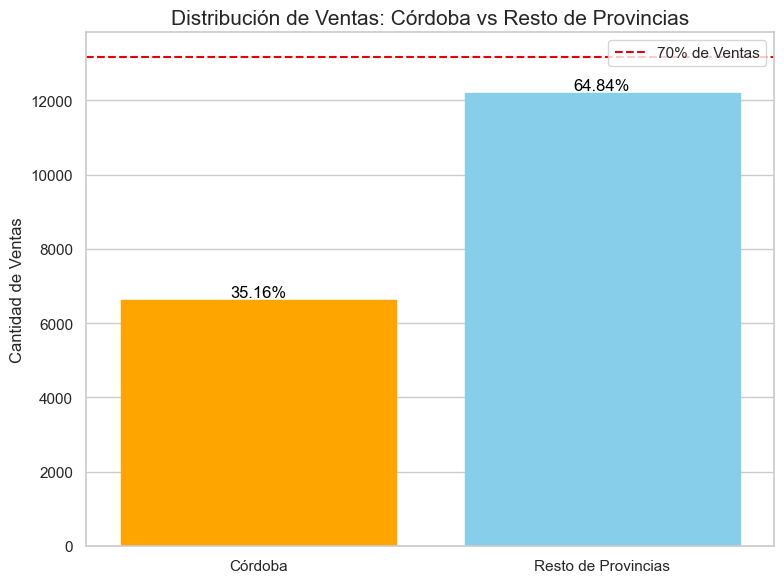

In [51]:
# Reutilizamos la variable "conteo_provincias" de Pedidos - "cantVentas" o total de ventas se reutiliza

# Separar Córdoba y agrupar el resto como "Resto de Provincias"
conteo_cordoba = conteo_provincias['Córdoba']
conteo_resto_prov = conteo_provincias.drop('Córdoba').sum()

# Crear un nuevo Series con Córdoba y el resto
ventas_agrupadas = pd.Series([conteo_cordoba, conteo_resto_prov], index=['Córdoba', 'Resto de Provincias'])

# Crear lienzo y Gráfico 
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=ventas_agrupadas.index, y=ventas_agrupadas.values)

# Configuración de cada barra
colores = ['orange', 'skyblue']
for i, bar in enumerate(bars.patches):
  bar.set_color(colores[i]) # Asignar colores manualmente a cada barra

  # Calcular el porcentaje para cada barra
  porcentaje = (ventas_agrupadas.values[i] / cantVentas) * 100

  # Colocar el texto de porcentaje justo encima de cada barra
  bars.text(
      bar.get_x() + bar.get_width() / 2,  # Posición en X
      bar.get_height() + 5,               # Posición en Y (ligeramente encima de la barra)
      f'{porcentaje:.2f}%',               # Texto con formato de porcentaje
      ha='center', va='bottom',           # Alineación del texto
      fontsize=12, color='black'          # Tamaño y color del texto
  )

# Estética
plt.title('Distribución de Ventas: Córdoba vs Resto de Provincias', fontsize=15)
plt.xlabel('')
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.axhline(y=len(pedidos) * 0.7, color='r', linestyle='--', label='70% de Ventas')  # Línea de referencia 70%
plt.legend() # Mostrar leyenda
plt.tight_layout() # Ajustar el layout para evitar solapamientos

plt.show()

Contrario a lo que se creía, la distribución de las ventas no era la que se esperaba, pero sigue siendo una cantidad de ventas importantes como para no descuidar su logística

#### <h4 style="color:#B87333; font-weight:bold;">GRÁFICO DISTRIBUCIÓN. TOP 5 PROVINCIAS</h4> 
Visualizaremos la proporción de ventas que provienen de las diferentes provincias. Solo mostraremos las primeras 5

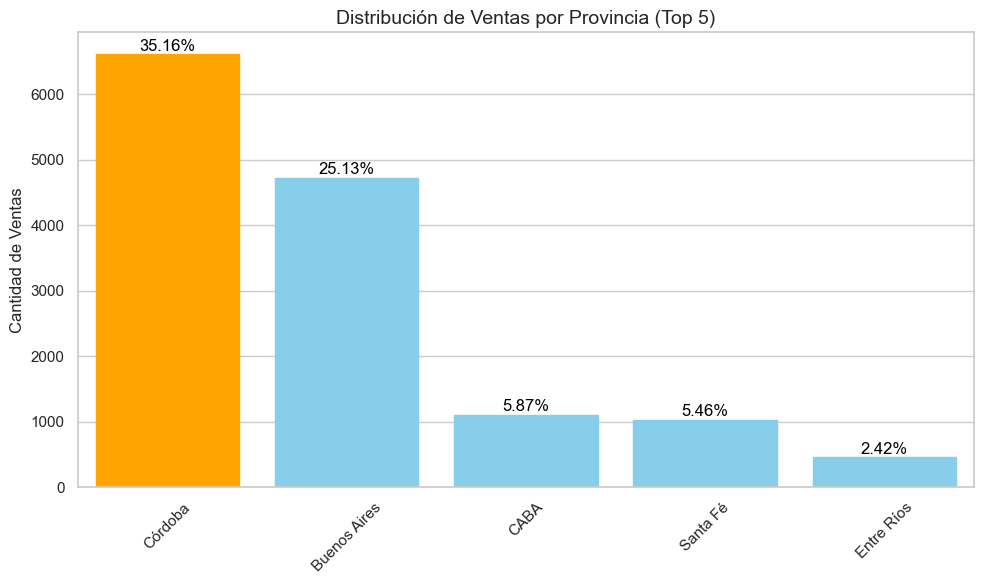

In [73]:
# Seleccionar las 5 provincias con más ventas
ventas_top_5 = conteo_provincias.sort_values(ascending=0).head(5)

# Crear lienzo y Gráfico 
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=ventas_top_5.index, y=ventas_top_5.values)

# Configuración de cada barra
colores = ['orange' if provincia == 'Córdoba' else 'skyblue' for provincia in ventas_top_5.index]
for i, bar in enumerate(bars.patches):
  bar.set_color(colores[i]) # Asignar colores manualmente a cada barra

  # Calcular el porcentaje para cada barra
  porcentaje = (ventas_top_5.values[i] / cantVentas) * 100

  # Colocar el texto de porcentaje justo encima de cada barra
  bars.text(
      bar.get_x() + bar.get_width() / 2,  # Posición en X
      bar.get_height() + 5,               # Posición en Y (ligeramente encima de la barra)
      f'{porcentaje:.2f}%',               # Texto con formato de porcentaje
      ha='center', va='bottom',           # Alineación del texto
      fontsize=12, color='black'          # Tamaño y color del texto
  )

# Estética
plt.title('Distribución de Ventas por Provincia (Top 5)', fontsize=14)
plt.xlabel('')
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Según este gráfico se puede observar una gran cantidad de ventas de Buenos Aires (+ Capital Federal) lo cual amerita que se analicé implementar una logística especial para dicha demanda que equivale a un 31 % de las ventas

### <h3 style="color:#FF1493; font-weight:bold;">Hipotesis 2: Concentración de ventas en tiendas</h3>
El 60% de las operaciones deberían estar concentradas en tres de las tiendas principales (Tiendas 1, 2 y 3).

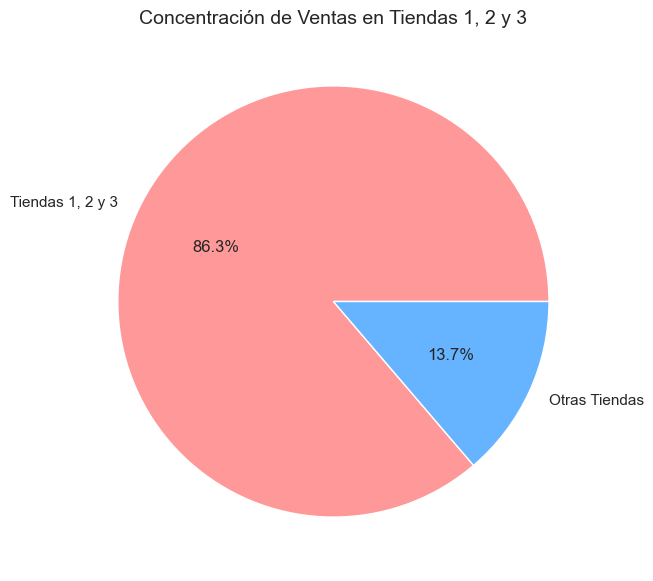

In [74]:
# Reutilizamos la variable "conteo_tiendas" de Pedidos - Además se agruparán las del Grupo Hipótesis (1)
ventas_por_tienda = pedidos['Tienda'].value_counts()

# Filtrar las tiendas 1, 2 y 5 y calcular el porcentaje
grupo_tiendas = conteo_tiendas [['1', '2', '3']].sum()
otras_tiendas = conteo_tiendas .sum() - grupo_tiendas

# Crear el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie([grupo_tiendas, otras_tiendas], labels=['Tiendas 1, 2 y 3', 'Otras Tiendas'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Concentración de Ventas en Tiendas 1, 2 y 3', fontsize=14)
plt.show()


Aunque se esperaba un 60% de las ventas en el grupo 1, el porcentaje fue mayor a lo esperado.

### <h3 style="color:#FF1493; font-weight:bold;">Hipotesis 3: Comportamiento temporal de las ventas</h3>
Se asume que la mayoría de las ventas ocurren durante los fines de semana.

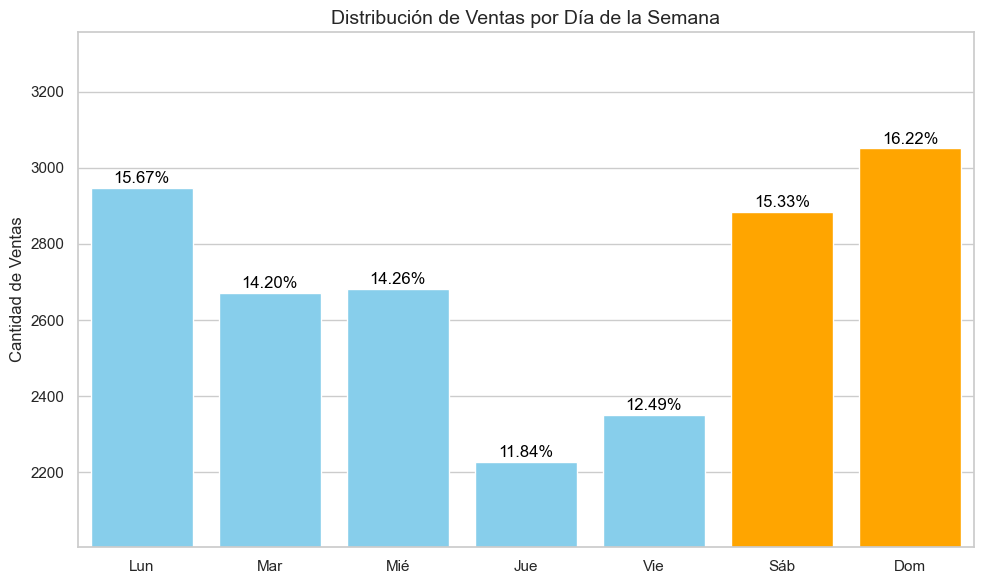

In [83]:
# Reutilizamos la variable "conteo_dias" de Pedidos que están ordenados por día -- 0 = lunes

# Crear lienzo y Gráfico
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=conteo_dias.index, y=conteo_dias.values)

# Colorear
for i in range(5): 
    bars.patches[i].set_facecolor('skyblue')
for i in range(5, 7):  # 5: sábado, 6: domingo
    bars.patches[i].set_facecolor('orange')  # Color naranja para el fin de semana

# Calcular el porcentaje para cada barra
for i, bar in enumerate(bars.patches):
    # Calcular el porcentaje para cada barra
    porcentaje = (conteo_dias.values[i] / cantVentas) * 100

    # Colocar el texto de porcentaje justo encima de cada barra
    bars.text(
    bar.get_x() + bar.get_width() / 2,  # Posición en X
    bar.get_height() + 5,               # Posición en Y (ligeramente encima de la barra)
    f'{porcentaje:.2f}%',               # Texto con formato de porcentaje
    ha='center', va='bottom',           # Alineación del texto
    fontsize=12, color='black'          # Tamaño y color del texto
    )

# Estética
plt.title('Distribución de Ventas por Día de la Semana', fontsize=14)
plt.xlabel('')
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.ylim(conteo_dias.values.min() * 0.9, conteo_dias.values.max() * 1.1) # Establecer el rango del eje y
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.tight_layout()
plt.show()

Como se esperaba los fines de feriado se realizan la mayoría de las ventas y el lunes, el lunes es un día que sigue al fin de semana, como si lo eligieran allí y realizasen la compra el lunes. El 47,22% de las ventas se producen en esos 3 días (31,55 el fin de semana).

Esto implica que los días lunes la logística debe estar preparada para afrontar el trabajo extra y se pueden establecer 2 grupos para pasar al área de marketing para que analice la mejor estrategia para nuestros productos

### <h3 style="color:#FF1493; font-weight:bold;">Hipotesis 4: Patrones horarios</h3>
Se estima que una cantidad considerable de ventas se realizan en horarios de siesta.

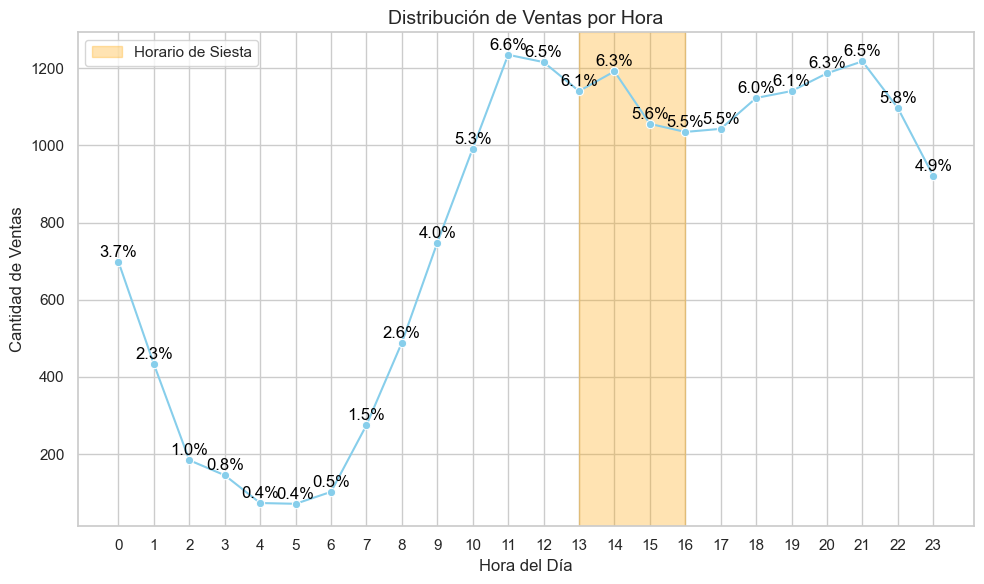

In [90]:
# Reutilizamos la variable "conteo_horas" de Pedidos

# Crear lienzo y Gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de líneas
line_plot = sns.lineplot(x=conteo_horas.index, y=conteo_horas.values, marker='o', color='skyblue')

# Resaltar el horario de la siesta (13:00 a 16:00)
plt.axvspan(13, 16, color='orange', alpha=0.3, label='Horario de Siesta')  # Sombrear el área de la siesta

# Calcular el porcentaje para cada punto y colocarlo en el gráfico
for i, value in enumerate(conteo_horas.values):
    porcentaje = (value / cantVentas) * 100

    # Colocar el texto de porcentaje justo encima de cada punto
    plt.text(
        conteo_horas.index[i],          # Posición en X
        value + 5,                      # Posición en Y (ligeramente encima del punto)
        f'{porcentaje:.1f}%',           # Texto con formato de porcentaje
        ha='center', va='bottom',       # Alineación del texto
        fontsize=12, color='black'      # Tamaño y color del texto
    )

# Estética
plt.title('Distribución de Ventas por Hora', fontsize=14)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.xticks(ticks=conteo_horas.index)  # Asegurar que las horas sean visibles
plt.legend()  # Mostrar leyenda
plt.tight_layout()
plt.show()

Contrariamente a lo que se esperaba hay un pico de operaciones en el medio día y para la noche, la mayoría de las operaciones se producen de 10 a 24 hs lo que también implica que los momentos más óptimos para realizar configuraciones bien temprano el día o durante la madrugada.